# Business Problem

"The labour problem" is the economics term widely used toward the turn of the twentieth century with various applications.It has been defined in many ways, such as "the problem of improving the conditions of employment of the wage-earning classes." It encompasses the difficulties faced by wage-earners and employers who began to cut wages for various reasons including increased technology, desire for lower costs or to stay in business.

Now the laor organization,https://labour.gov.in/lcandilasdivision/india-ilothe indian version of this recently published the data for the 1974 and 1975 and wanted to demo of data science such that the data of 1978 labor can be predicted. Now the problem is the data is a copy of USA version and have race in it.

Data Contains Age,Race, Educational detail and Labour earning for 1974, 1975. The problem we are solving is the prediction of the future labours earning. The earning can be dependant on many of the variables. We have data for following.

- Age of the person.

- Race : Is he/she is black or not black.

- Education Details : How qualified the person is?

- Hispanic : Is that person is Hispanic or not?

- Married : Does marriage affect the earnings. And other informations.

***Data Contains Age, Race, Educational detail and Labour earning for 1974, 1975. We need to predict the labours earning for 1978***

**Solution Approach:** As we need to predict Labour earning for 1978 which is continuous in nature, Linear Regression can be used for prediction


### Multiple Linear Regression

Now you know how to build a model with one X (feature variable) and Y (response variable). But what if you have three feature variables, or may be 10 or 100? Building a separate model for each of them, combining them, and then understanding them will be a very difficult and next to impossible task. By using multiple linear regression, you can build models between a response variable and many feature variables.

Let's see how to do that.

## Step 1: Importing libraries and Understanding Data

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading a csv file
df = pd.read_csv('labour_earning.csv')

In [3]:
#Dimension of the dataframe
df.shape

(15992, 9)

In [4]:
#First 10 rows of the dataframe
df.head(10)

,Age,Education,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869
5,22,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16365.760,18449.270,25564.670
6,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16804.630,16354.600,18059.300
7,18,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,1144.212,3620.032,15739.270
8,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,25862.320,25243.550,25564.670
9,45,HighSchool,NotBlack,NotHispanic,Married,0,25862.320,0.000,3924.842


### Data Type

In [5]:
#Checking data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Education      15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


### Summary of dataset

In [6]:
#Let's look at statistical information of continuous variables of a dataset
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [7]:
#Let's look at statistical information of categorical variables of a dataset
df.describe(include='object')

,Education,Race,Hisp,MaritalStatus
count,15992,15992,15992,15992
unique,5,2,2,2
top,HighSchool,NotBlack,NotHispanic,Married
freq,6252,14816,14840,11382


### Frequency Table

In [8]:
#Frequency table of Education variable
df['Education'].value_counts()

HighSchool            6252
LessThanHighSchool    4731
Intermediate          2708
graduate              1367
PostGraduate           934
Name: Education, dtype: int64

In [9]:
#Frequency table of Education variable in percentage variable
df['Education'].value_counts()/len(df)*100

HighSchool            39.094547
LessThanHighSchool    29.583542
Intermediate          16.933467
graduate               8.548024
PostGraduate           5.840420
Name: Education, dtype: float64

39% labours have completed their HighSchool, 9% labours have completed their graduation and 6% labours have completed their Post Graduation.

In [10]:
#Frequency table of Race variable
df['Race'].value_counts()

NotBlack    14816
black        1176
Name: Race, dtype: int64

In [11]:
#Frequency table of Race variable in percentage variable
df['Race'].value_counts()/len(df)*100

NotBlack    92.646323
black        7.353677
Name: Race, dtype: float64

93% are not black and 7% are black.

In [12]:
#Frequency table of Hisp variable
df['Hisp'].value_counts()

NotHispanic    14840
hispanic        1152
Name: Hisp, dtype: int64

In [13]:
#Frequency table of Hisp variable in percentage variable
df['Hisp'].value_counts()/len(df)*100

NotHispanic    92.796398
hispanic        7.203602
Name: Hisp, dtype: float64

93% are not hispanic and 7% are hispanic.

In [14]:
#Frequency table of Nodeg variable
df['Nodeg'].value_counts()

0    11261
1     4731
Name: Nodeg, dtype: int64

In [15]:
#Frequency table of Nodeg variable in percentage variable
df['Nodeg'].value_counts()/len(df)*100

0    70.416458
1    29.583542
Name: Nodeg, dtype: float64

In [16]:
#Frequency table of MaritalStatus variable
df['MaritalStatus'].value_counts()

Married       11382
NotMarried     4610
Name: MaritalStatus, dtype: int64

In [17]:
#Frequency table of MaritalStatus variable in percentage variable
df['MaritalStatus'].value_counts()/len(df)*100

Married       71.173087
NotMarried    28.826913
Name: MaritalStatus, dtype: float64

71% labours were married and 29% were not married.

## Step 2: Visualizing Data

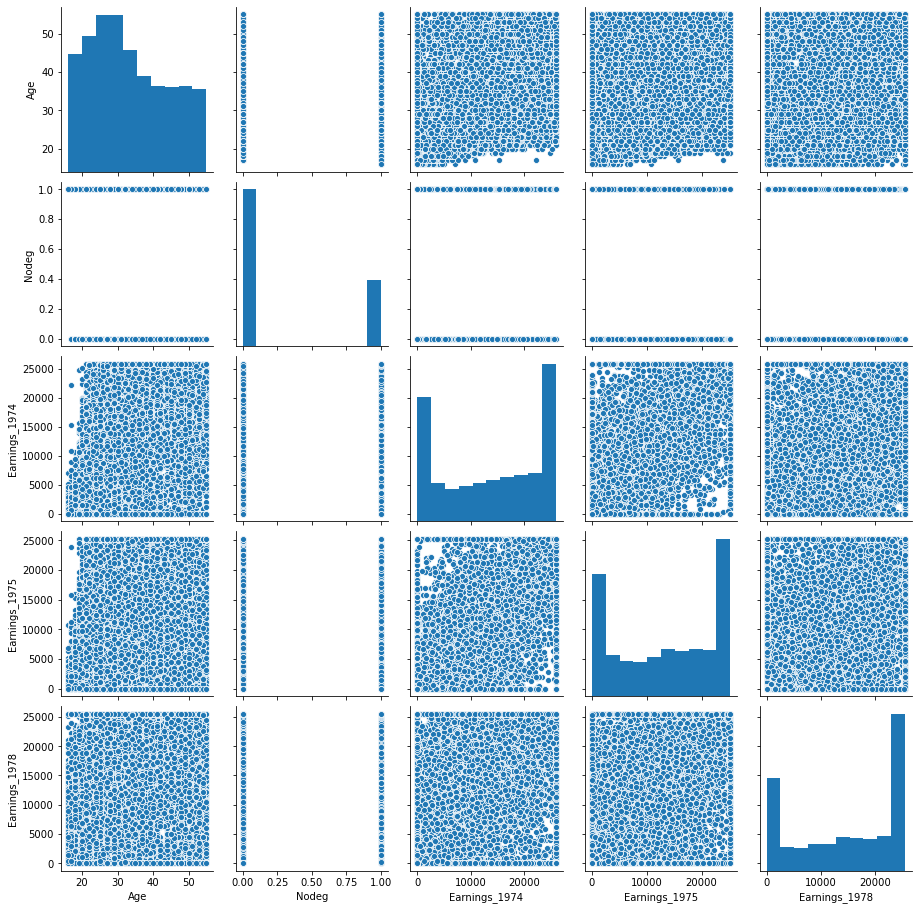

In [18]:
#Let's plot a pair plot of all numerical variable in a dataframe
sns.pairplot(df)

C:\Users\admin\conda\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


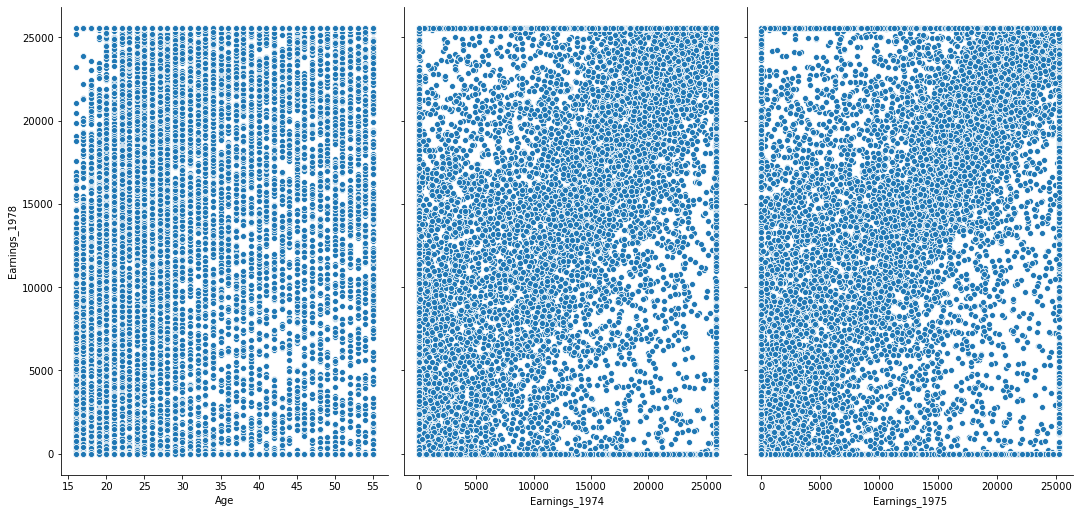

In [19]:
#Visualize the relationship between the features and the response using scatter plot
sns.pairplot(df, x_vars=['Age', 'Earnings_1974', 'Earnings_1975'], y_vars='Earnings_1978', size=7, aspect=0.7, kind='scatter')

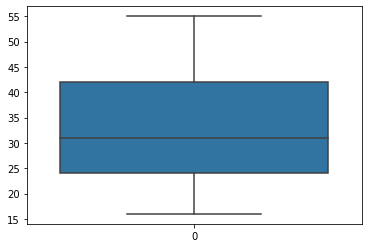

In [20]:
#Boxplot of Age variable
sns.boxplot(data=df['Age'])

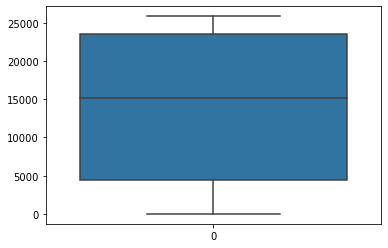

In [21]:
#Boxplot of Earnings_1974 variable
sns.boxplot(data=df['Earnings_1974'])

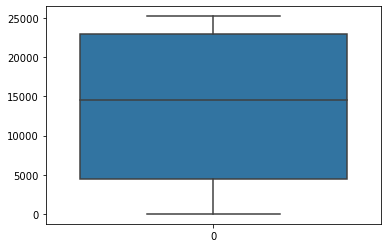

In [22]:
#Boxplot of Earnings_1975 variable
sns.boxplot(data=df['Earnings_1975'])

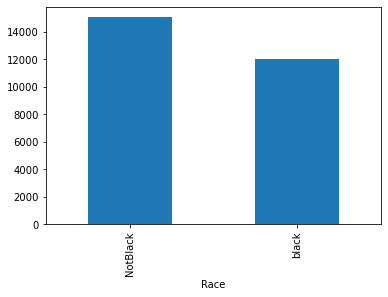

In [23]:
#Mean earning of labours in 1978 based on Race
df.groupby('Race')['Earnings_1978'].mean().plot.bar()

Black labours were earning less than those people who were not black.

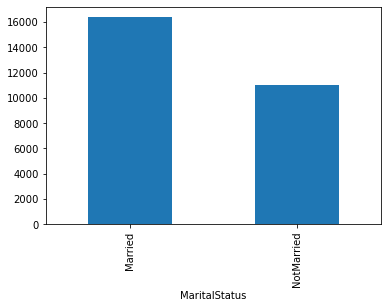

In [24]:
#Mean earning of Labours in 1978 based on MaritalStatus 
df.groupby('MaritalStatus')['Earnings_1978'].mean().plot.bar()

Married labours are earning more than bachelor labours.

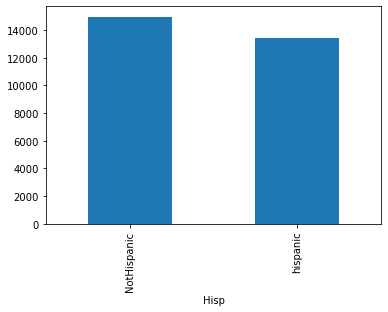

In [25]:
#Mean earning of labours in 1978 based on Hisp
df.groupby('Hisp')['Earnings_1978'].mean().plot.bar()

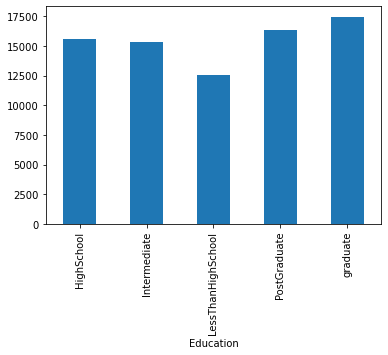

In [26]:
#Mean earning of labours in 1978 based on education
df.groupby('Education')['Earnings_1978'].mean().plot.bar()

Labours who had completed theirs graduation and post graduation were earning more than other labours

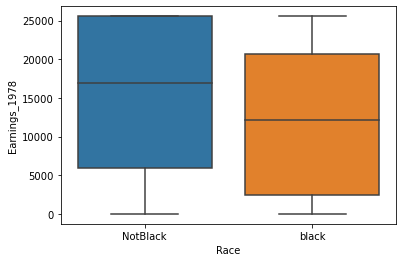

In [27]:
#Boxplot of Earnings_1978 based on Race
sns.boxplot(x=df['Race'], y=df["Earnings_1978"])

Median earning of nonblack labour is more than black people.

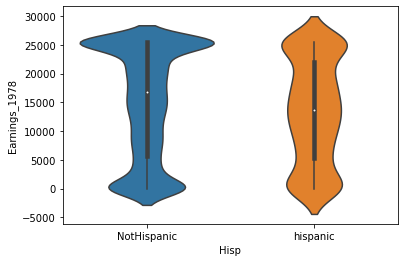

In [28]:
#Violinplot of Earnings_1978 based on Hisp
sns.violinplot(x=df['Hisp'], y=df['Earnings_1978'])

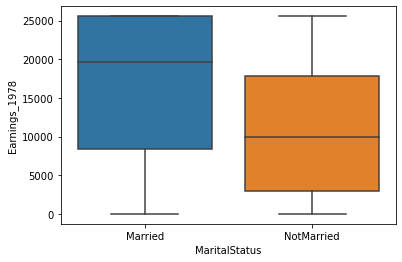

In [29]:
#Boxplot of Earnings_1978 based on MaritalStatus
sns.boxplot(x=df['MaritalStatus'], y=df['Earnings_1978'])

Median earning of married labours were more than unmarried labours.

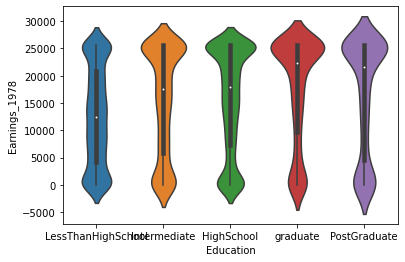

In [30]:
#Violinplot of Earnings_1978 based on Education variable
sns.violinplot(x=df['Education'], y=df['Earnings_1978'])

### Seperate Numerical and Categorical variables

#### Numerical variables

In [31]:
df_num = df[['Age', 'Nodeg', 'Earnings_1974', 'Earnings_1975', 'Earnings_1978']]

**Categorical Variables:** The variables which are having category should be converted to dummy variables.

- The Linear regression will only accept numbers so we will make dummy variables.

In [32]:
df_dummies = pd.get_dummies(df[['Race', 'Hisp', 'Education', 'MaritalStatus']])
df_dummies.head()

,Race_NotBlack,Race_black,Hisp_NotHispanic,Hisp_hispanic,Education_HighSchool,Education_Intermediate,Education_LessThanHighSchool,Education_PostGraduate,Education_graduate,MaritalStatus_Married,MaritalStatus_NotMarried
0,1,0,1,0,0,0,1,0,0,1,0
1,1,0,1,0,0,1,0,0,0,0,1
2,1,0,1,0,1,0,0,0,0,1,0
3,1,0,1,0,0,0,1,0,0,1,0
4,1,0,1,0,0,0,1,0,0,1,0


### Combine Numerical and Dummy variables

In [33]:
df = pd.concat([df_num, df_dummies], axis=1)
df.head()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,Race_NotBlack,Race_black,Hisp_NotHispanic,Hisp_hispanic,Education_HighSchool,Education_Intermediate,Education_LessThanHighSchool,Education_PostGraduate,Education_graduate,MaritalStatus_Married,MaritalStatus_NotMarried
0,45,1,21516.670,25243.550,25564.670,1,0,1,0,0,0,1,0,0,1,0
1,21,0,3175.971,5852.565,13496.080,1,0,1,0,0,1,0,0,0,0,1
2,38,0,23039.020,25130.760,25564.670,1,0,1,0,1,0,0,0,0,1,0
3,48,1,24994.370,25243.550,25564.670,1,0,1,0,0,0,1,0,0,1,0
4,18,1,1669.295,10727.610,9860.869,1,0,1,0,0,0,1,0,0,1,0


## Step 3: Splitting the dataset into Train set and Test set

Using sklearn we split 70% of our data into training set and rest in test set.

Setting random_state will give the same training and test set everytime on running the code. random_state is the seed used by the random number generator. It can be any integer.

In [34]:
#Seperate Independent and Dependent variables
X = df.drop('Earnings_1978', axis=1)
y = df['Earnings_1978']

In [35]:
#Creating Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

## Step 4: Implementing Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
#Creating an instance of LinearRegression
lr = LinearRegression()

In [38]:
#Fit the model to the training data
lr.fit(X_train, y_train)

LinearRegression()

## Step 5: Model Evaluation

In [39]:
#Print the intercept
lr.intercept_

7728.164198596458

In [40]:
#Let's see the coefficients
coeff_df = pd.DataFrame(lr.coef_,index=X_test.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Age,-107.471456
Nodeg,-358.187550
Earnings_1974,0.283021
Earnings_1975,0.475762
Race_NotBlack,457.097313
Race_black,-457.097313
Hisp_NotHispanic,247.490005
Hisp_hispanic,-247.490005
Education_HighSchool,-542.636378
Education_Intermediate,-308.617296


From the above result we may infer that if Age increses by 1 unit

it will affect Earnings_1978 by -107.471456 units.

## Step 6: Make Predictions

In [41]:
#Making predictions using the model
y_pred = lr.predict(X_test)
y_pred

array([ 9925.15924856, 22832.57239702,  2059.51797455, ...,
       22716.06739742, 15542.99767909, 22692.07831716])

## Step 7: Model Performance Metrics

### Coefficient of Determination (R square)

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [43]:
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", sqrt(mean_squared_error(y_test, y_pred)))
print("R-Square : ", r2_score(y_test, y_pred))

Mean Squared Error :  48044565.7085211
Root Mean Squared Error :  6931.418737063942
R-Square :  0.4734463423188843


If the value of R2 is 0.473 then this suggests that 47.3% of the variation in Y can be explained with the help of given explanatory variables in that model. In other words, it explains the proportion of variation in the dependent variable that is explained by the independent variables.

On addition of a new variable the error is sure to decrease, thus R square always increases whenever a new variable is added to our model. This may not describe the importance of a variable

**Adjusted R square will always be less than or equal to R square.**

- Thus as a general thumb rule if adjusted R square increases when a new variable is added to the model, the variable should     remain in the model.

- If the adjusted R square decreases when the new variable is added then the variable should not remain in the mode

#### Multicollinearity

If independent valriables Xi’s are highly correlated then |X’X| will be close to 0 and hence inverse of (X’X) will not exist or will be indefinitely large. Mathematically, which will be indefinitely large in presence of multicollinearity. Long story in short, multicollinearity increases the estimate of standard error of regression coefficients which makes some variables statistically insignificant when they should be significant.

How can you detect multicollinearity!!

#### Correlation Method:

By calculating the correlation coefficients between the variables we can get to know about the extent of multicollinearity in the data.

#### VIF (Variance Inflation Factor) Method:

Firstly we fit a model with all the variables and then calculate the variance inflation factor (VIF) for each variable. VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated. The higher the value of VIF for ith regressor, the more it is highly correlated to other variables

### Optional Step : Checking for P-value Using STATSMODELS

In [44]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
#Create a fitted model in one line
lm = sm.OLS(y_train, X_train_sm).fit()
#Print the coefficient
lm.params

const                           2838.917461
Age                             -107.471456
Nodeg                            -42.752277
Earnings_1974                      0.283021
Earnings_1975                      0.475762
Race_NotBlack                   1876.556043
Race_black                       962.361418
Hisp_NotHispanic                1666.948736
Hisp_hispanic                   1171.968725
Education_HighSchool              88.234169
Education_Intermediate           322.253251
Education_LessThanHighSchool     -42.752277
Education_PostGraduate          1294.149279
Education_graduate              1177.033039
MaritalStatus_Married           1446.597262
MaritalStatus_NotMarried        1392.320198
dtype: float64

In [45]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Earnings_1978   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     1015.
Date:                Thu, 04 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:51:53   Log-Likelihood:            -1.1501e+05
No. Observations:               11194   AIC:                         2.301e+05
Df Residuals:                   11183   BIC:                         2.301e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         2838.9175    104.962     27.047      0.000    2633.174    3044.661
Age                           -107.4715      7.047    -15.250      0.000    -121.286     -93.657
Nodeg                          -42.7523     71.506     -0.598      0.550    -182.916      97.412
Earnings_1974                    0.2830      0.015     19.290      0.000       0.254       0.312
Earnings_1975                    0.4758      0.015     32.190      0.000       0.447       0.505
Race_NotBlack                 1876.5560    116.201     16.149      0.000    1648.781    2104.331
Race_black                     962.3614    157.228      6.121      0.000     654.167    1270.555
Hisp_NotHispanic              1666.9487    118.543     14.062      0.000    1434.584    1899.313
Hisp_hispanic                 1171.9687    160.668      7.294      0.000     857.031    1486.907
Education_HighSchool            88.2342    118.839      0.742      0.458    -144.711     321.180
Education_Intermediate         322.2533    148.472      2.170      0.030      31.222     613.284
Education_LessThanHighSchool   -42.7523     71.506     -0.598      0.550    -182.916      97.412
Education_PostGraduate        1294.1493    229.462      5.640      0.000     844.362    1743.936
Education_graduate            1177.0330    194.234      6.060      0.000     796.300    1557.766
MaritalStatus_Married         1446.5973    111.108     13.020      0.000    1228.807    1664.388
MaritalStatus_NotMarried      1392.3202     87.872     15.845      0.000    1220.076    1564.564
==============================================================================
Omnibus:                     1026.992   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1768.288
Skew:                          -0.657   Prob(JB):                         0.00
Kurtosis:                       4.437   Cond. No.                     1.70e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.11e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

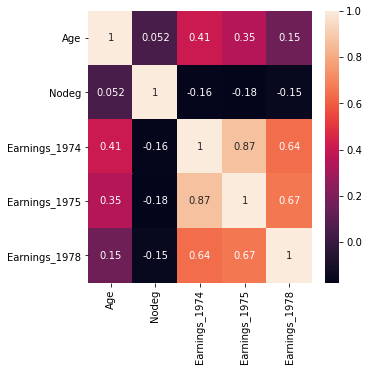

In [46]:
plt.figure(figsize=(5, 5))
sns.heatmap(df_num.corr(), annot=True)

## Step 8: Implementing the Results

From the data above, you can conclude that Newspaper is insignificant.

Text(0, 0.5, 'Earnings_1978')

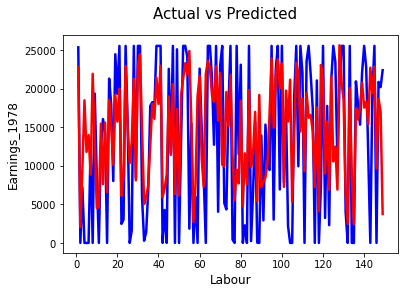

In [47]:
#Actual vs Predicted
#Check for the first 150 observations
c = [i for i in range(1, 150, 1)]
fig = plt.figure()
plt.plot(c, y_test[1:150], color='blue', linewidth=2.5, linestyle="-")
plt.plot(c, y_pred[1:150], color='red', linewidth=2.5, linestyle="-")
fig.suptitle('Actual vs Predicted', fontsize=15)
plt.xlabel('Labour', fontsize=12)
plt.ylabel('Earnings_1978', fontsize=12)

Text(0, 0.5, 'Actual - Predicted')

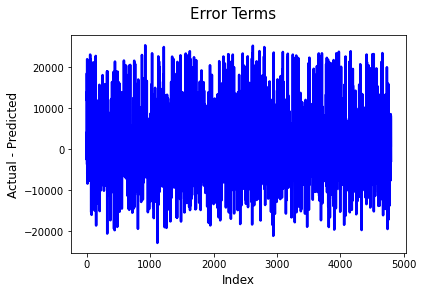

In [48]:
#Error Terms
c = [i for i in range(1, 4799, 1)]
fig = plt.figure()
plt.plot(c, y_pred-y_test, color='blue', linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Actual - Predicted', fontsize=12)

#### Variance Inflation Factor
Variance inflation factor (VIF) for an explanatory variable is given 1/(1-R^2 ) .

Here, we take that particular X as response variable and all other explanatory

variables as independent variables. So, we run a regression between one of

those explanatory variables with remaining explanatory variables.

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

C:\Users\admin\conda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [51]:
vif.round(2)

,VIF Factor,features
0,1.37,Age
1,inf,Nodeg
2,4.41,Earnings_1974
3,4.18,Earnings_1975
4,inf,Race_NotBlack
5,inf,Race_black
6,inf,Hisp_NotHispanic
7,inf,Hisp_hispanic
8,inf,Education_HighSchool
9,inf,Education_Intermediate


#### Variance Inflation Factor
Please read more about VIF and the cut off of Variance

The thumb rule is VIF greater than 10 should be removed.